In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

##### Dataset

In [4]:
data = fetch_california_housing()

In [5]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
df['Target'] = data.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
#Independent features
X = df.drop(columns="Target")
#Dependent features
y = df["Target"]

##### Dividing dataset into training and testing sets

In [11]:
x_train,x_test,y_train,y_test= train_test_split(X, y, test_size=0.3, random_state=42)

##### Model

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
DTRegressor = DecisionTreeRegressor()
DTRegressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
y_predictions = DTRegressor.predict(x_test)

##### Metrics

In [15]:
from sklearn.metrics import r2_score,root_mean_squared_error

In [16]:
print(f"R2_score: {r2_score(y_test,y_predictions)}")
print(f"RMSE: {root_mean_squared_error(y_test,y_predictions)}")

R2_score: 0.5872707257082301
RMSE: 0.7360188354769579


##### Optimal paramaters using GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
hyperparameters = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
                  'splitter': ['best','random'],
                  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
                   'max_features':['auto', 'sqrt', 'log2']}
regressor = DecisionTreeRegressor()

In [22]:
regressor_GSCV = GridSearchCV(estimator=regressor, param_grid=hyperparameters, cv=3, scoring='neg_mean_squared_error')

In [23]:
regressor_GSCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [24]:
regressor_GSCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [25]:
predictions = regressor_GSCV.predict(x_test)

In [26]:
print(f"R2_score: {r2_score(y_test,predictions)}")
print(f"RMSE: {root_mean_squared_error(y_test,predictions)}")

R2_score: 0.6856541993550815
RMSE: 0.6423328351169014


##### Visualization with best parameters

In [27]:
DTRegressor = DecisionTreeRegressor(criterion='squared_error',max_depth=11, max_features='log2', splitter='best')
DTRegressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=11, max_features='log2')

In [28]:
y_predictions = DTRegressor.predict(x_test)
print(f"R2_score: {r2_score(y_test,y_predictions)}")
print(f"RMSE: {root_mean_squared_error(y_test,y_predictions)}")

R2_score: 0.6565281561908869
RMSE: 0.6714317321248972


In [29]:
from sklearn import tree

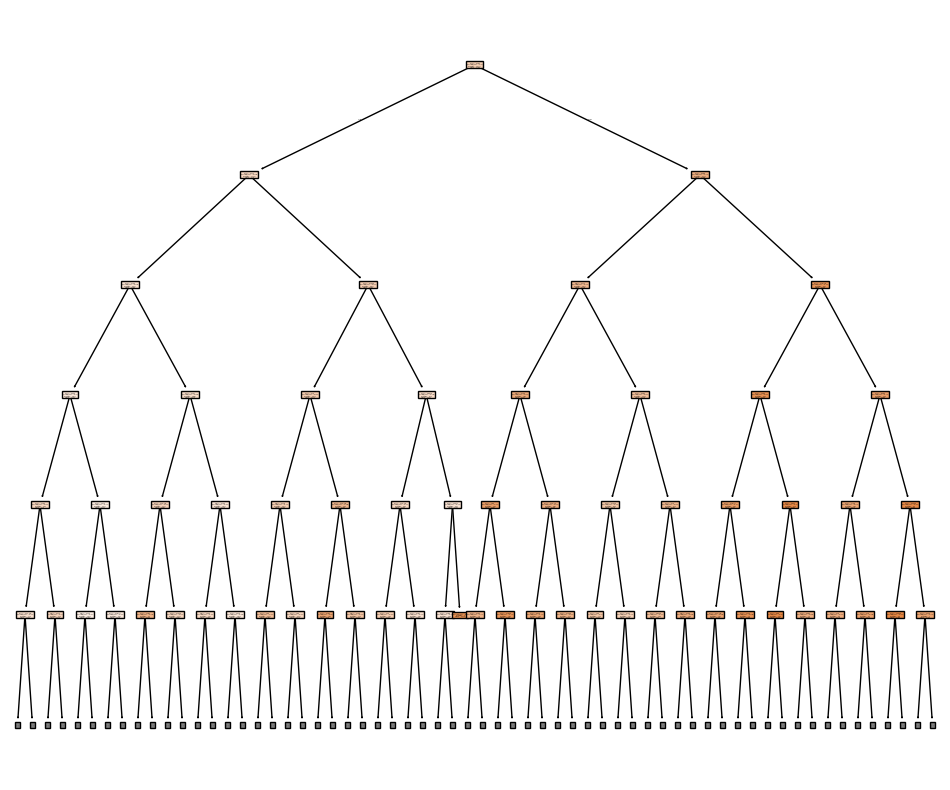

In [30]:
plt.figure(figsize=(12,10))
tree.plot_tree(DTRegressor, max_depth=5, filled=True)
plt.show()